# Sentiment Analysis on Twitter Data: Exploring Abortion Discourse
by Alan Cheung and Bezawit Ayalew

In this project, we perform sentiment analysis on a Twitter dataset focused on discussions surrounding abortion. Utilizing Python, we employ various natural language processing (NLP) techniques to analyze the sentiment expressed in tweets related to abortion. By processing and classifying the sentiment of these tweets, we aim to gain insights into public opinion and attitudes regarding this sensitive topic.








## Dataset Loading and Cleaning

This section focuses on loading and cleaning Twitter data from a CSV file. It performs operations to remove URLs, mentions, hashtags, extra spaces, leading/trailing spaces, and punctuations from tweet text. It also eliminates duplicate tweets based on text and user ID, and drops rows with empty tweet text.

### Functions:

The following functions are available:

- `clean_text(text)`: Cleans the provided text.
- `clean_tweets()`: Cleans the tweet text in the dataset, removes duplicates based on text and user ID, and drops rows with empty tweet text.
- `display_cleaned_data()`: Displays the first few rows of the cleaned Twitter data.


In [35]:
import pandas as pd
import re

class TweetCleaner:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
        self.original_df = self.df.copy()  # Store a copy of the original DataFrame

    def clean_text(self, text):
        text = text.lower()  # convert text to lowercase
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove URLs
        #text = re.sub(r'\@w+', '', text)  # remove mentions
        text = re.sub(r'\@\w+', '', text)  # remove mentions
        text = re.sub(r'\#\w+', '', text)  # remove hashtags
        text = re.sub(r'\s+', ' ', text)  # replace multiple spaces with a single space
        text = re.sub(r"^\s+|\s+$", "", text)  # remove spaces at the beginning and at the end of string
        text = re.sub(r'[^\w\s]', '', text)  # remove punctuations
        return text

    def clean_tweets(self):
        self.df['cleaned_text'] = self.df['text'].apply(self.clean_text)
        self.df.drop_duplicates(subset=['cleaned_text', 'hashed_userid'], inplace=True)
        self.df.dropna(subset=['cleaned_text'], inplace=True)
        self.df['tweetcreatedts'] = pd.to_datetime(self.df['tweetcreatedts'])  # Convert to datetime
        return self.df

    def display_cleaned_data(self):
        print(self.df.head())
        print("Total number of tweets cleaned:", len(self.df))
    
    def load_original_data(self):
        return self.original_df

# Displays and executes cleaning 
if __name__ == "__main__":
    cleaner = TweetCleaner('twitter_data.csv')
    cleaner.clean_tweets()
    cleaner.display_cleaned_data()


   Unnamed: 0         hashed_userid masked_username         location  \
0           0  13028308852725196659       *****roy1              NaN   
1           1  45494576030177085457     ******eam_6              NaN   
2           2  23641094384211702614     ******erlin  Los Angeles, CA   
3           3  21587659761682762378    ******oshi23           Mumbai   
4           4  47915146590553055505    ******4Truth              NaN   

   following  followers  totaltweets usercreateddt              tweetid  \
0       9590       8725        29317    2012-01-24  1542763288815030273   
1       8874      10090        33053    2019-02-07  1542763315926994945   
2       7730      10006        35360    2008-08-07  1542763330670014464   
3        232        132         4970    2016-05-10  1542763339738382337   
4       6914       6310        49958    2021-04-02  1542763352279003136   

       tweetcreatedts  ...                                           hashtags  \
0 2022-07-01 06:53:25  ...  [{'text

## Data Preprocessing

This Python code segment performs text preprocessing on tweets stored in a DataFrame. The preprocessing steps include tokenization, stopword removal, and stemming. The `preprocess_text()` function is defined to tokenize the text, remove stopwords, and stem the remaining words. The cleaned DataFrame is then used to apply the `preprocess_text()` function to the 'cleaned_text' column, and the preprocessed text is stored in a new column named 'preprocessed_text'. Finally, the first few rows of the DataFrame with preprocessed text are printed.


In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Optional: Stemming (you can also use Lemmatization based on your preference)
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Join the tokens back into a string
    return ' '.join(stemmed_tokens)

if __name__ == "__main__":
    cleaner = TweetCleaner('twitter_data.csv')
    cleaned_df = cleaner.clean_tweets()

    cleaned_df['preprocessed_text'] = cleaned_df['cleaned_text'].apply(preprocess_text)

    print(cleaned_df.head())


   Unnamed: 0         hashed_userid masked_username         location  \
0           0  13028308852725196659       *****roy1              NaN   
1           1  45494576030177085457     ******eam_6              NaN   
2           2  23641094384211702614     ******erlin  Los Angeles, CA   
3           3  21587659761682762378    ******oshi23           Mumbai   
4           4  47915146590553055505    ******4Truth              NaN   

   following  followers  totaltweets usercreateddt              tweetid  \
0       9590       8725        29317    2012-01-24  1542763288815030273   
1       8874      10090        33053    2019-02-07  1542763315926994945   
2       7730      10006        35360    2008-08-07  1542763330670014464   
3        232        132         4970    2016-05-10  1542763339738382337   
4       6914       6310        49958    2021-04-02  1542763352279003136   

       tweetcreatedts  ...  language favorite_count is_retweet  \
0 2022-07-01 06:53:25  ...        en              

## Exploratory Data Analysis: Visualization and Insights

This segment delves into exploratory data analysis (EDA) through visualization and insights:

1. **Histogram of Text Lengths:** The function `plot_text_length_histogram()` generates a histogram displaying the distribution of tweet text lengths.

2. **Bar Chart of Missing Values:** The function `plot_missing_values_bar_chart()` creates a bar chart illustrating the count of missing values in each column of the dataset.

3. **Duplicate Tweets Handling:** The function `visualize_duplicate_tweets_before_after()` visualizes the number of tweets before and after the removal of duplicate entries. It also calculates and displays the total number of duplicate tweets removed.

4. **Word Cloud Generation:** Two word clouds are generated: one before preprocessing using the original tweet text and another after preprocessing using the cleaned tweet text.

5. **Saving Cleaned Data:** The DataFrame `df2` is created as a copy of the original DataFrame `df`, excluding the column 'cleaned_text'. This cleaned data is then saved to a CSV file named "cleaned_data.csv".

6. **Histogram of Retweet Counts:** A histogram is plotted to visualize the distribution of retweet counts.

7. **Time Series Analysis:** The tweet counts over time are visualized using a time series plot.

8. **Top Languages Bar Plot:** A bar plot displays the top 5 languages used in the tweets.

9. **Histogram of Followers:** A histogram illustrates the distribution of the number of followers.

10. **Summary Statistics:** Summary statistics are calculated and displayed for the number of followers, retweet count, and tweet length.

---



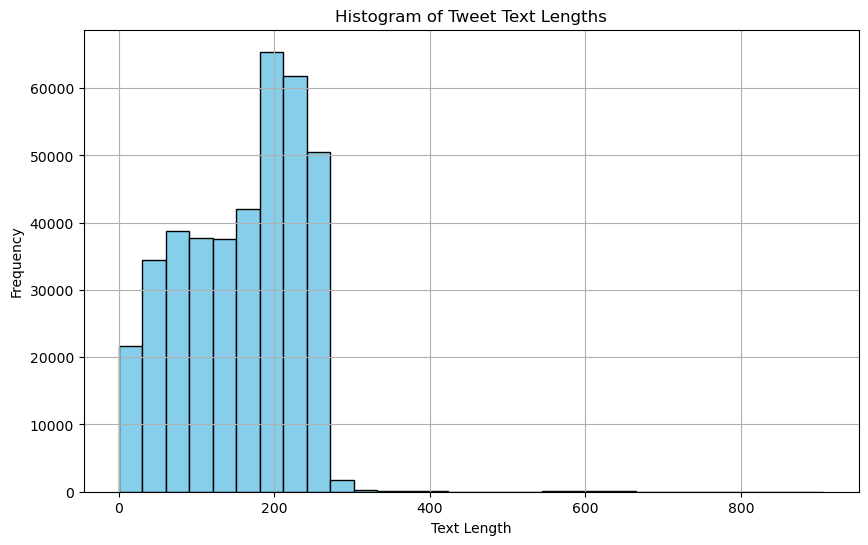

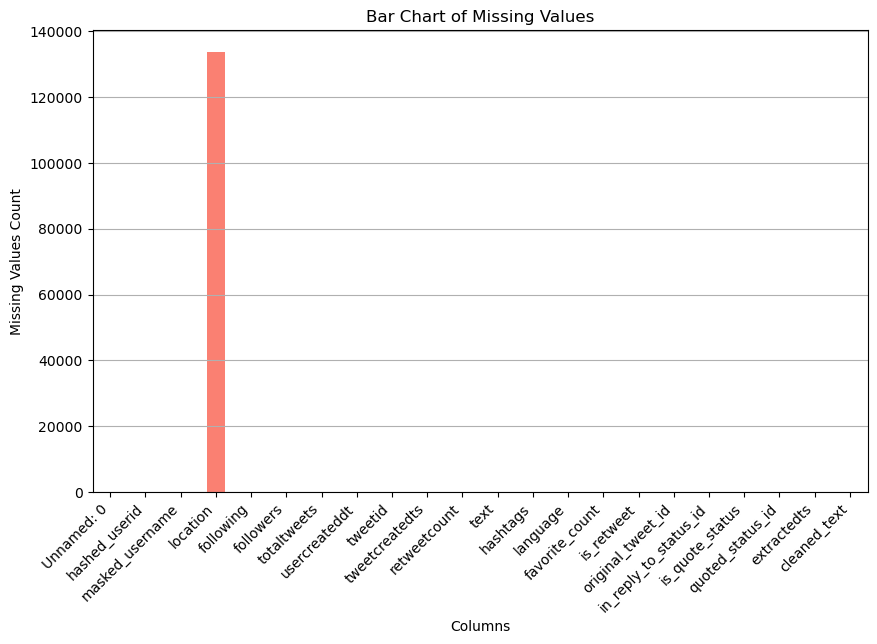

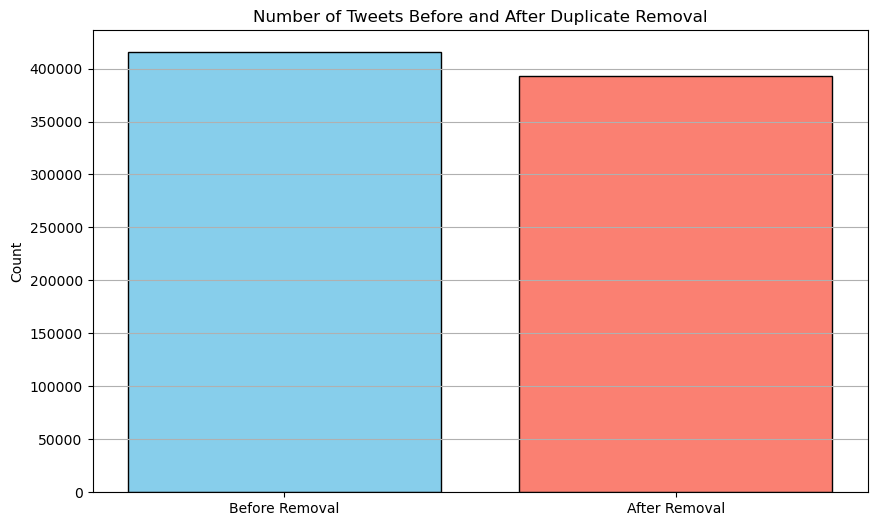

Total duplicate tweets removed: 22673


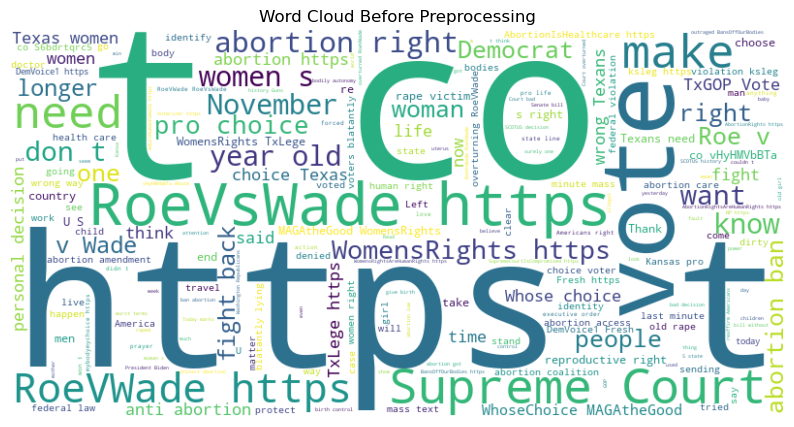

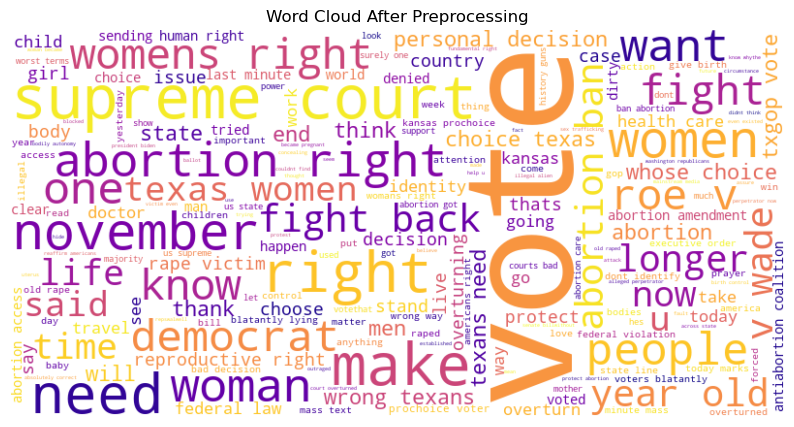

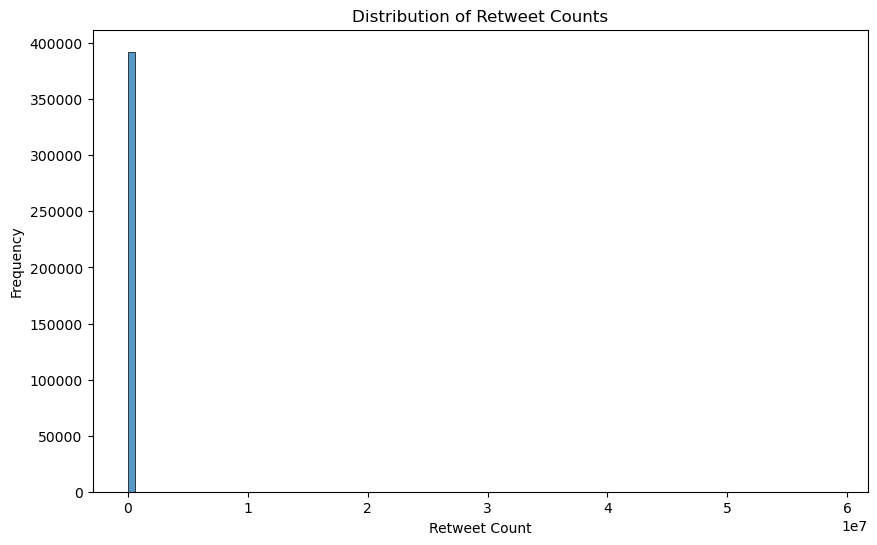

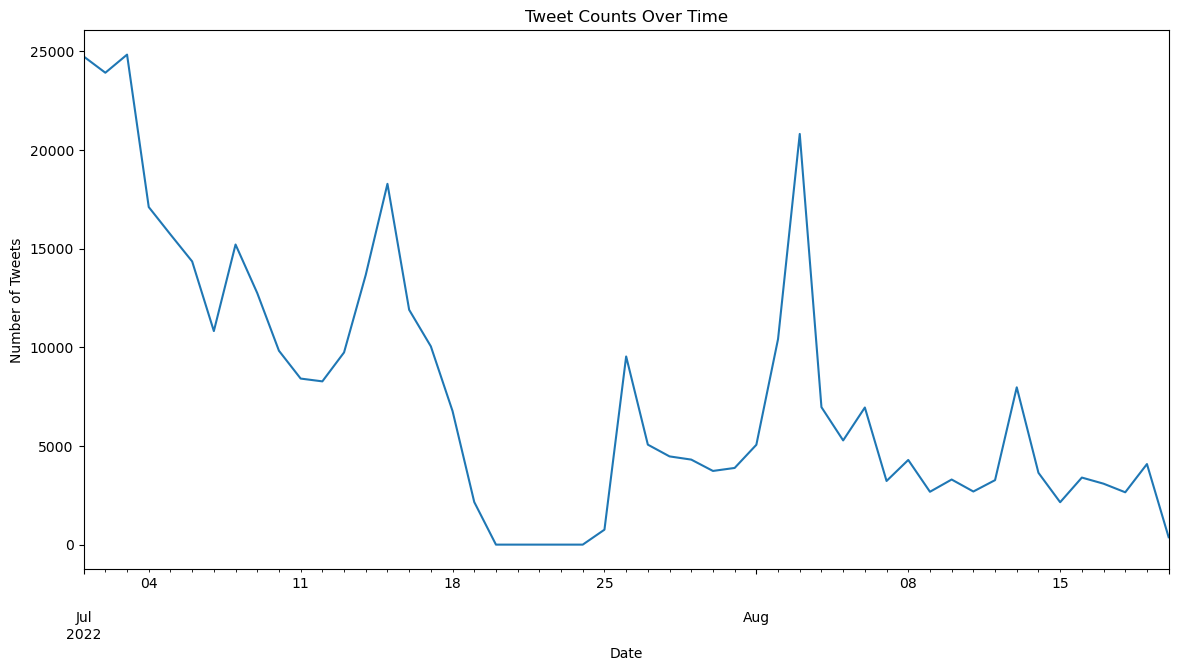

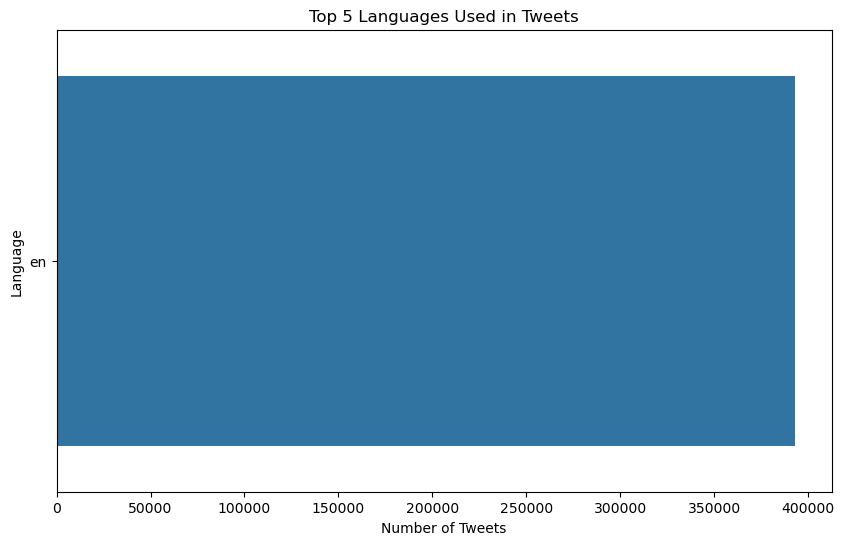

Summary Statistics for Followers:
 count     392699.0
mean        7172.7
std       150148.3
min            0.0
25%          176.0
50%          808.0
75%         3181.0
max     58745067.0
Name: followers, dtype: float64
Total number of entries: 392699


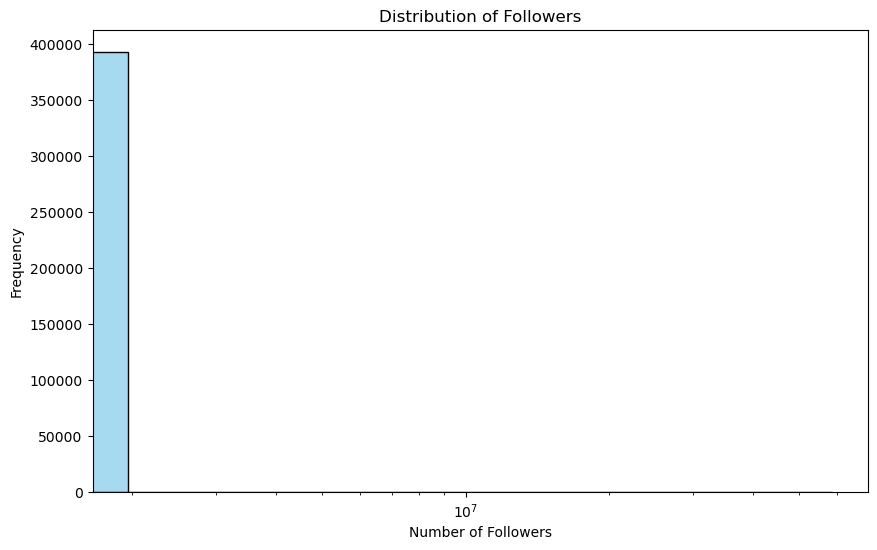

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


class TweetVisualizer:
    def __init__(self, df):
        self.df = df
    
    def plot_text_length_histogram(self):
        plt.figure(figsize=(10, 6))
        plt.hist(self.df['cleaned_text'].str.len(), bins=30, color='skyblue', edgecolor='black')
        plt.title('Histogram of Tweet Text Lengths')
        plt.xlabel('Text Length')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    
    def plot_missing_values_bar_chart(self):
        missing_values_count = self.df.isnull().sum()
        plt.figure(figsize=(10, 6))
        missing_values_count.plot(kind='bar', color='salmon')
        plt.title('Bar Chart of Missing Values')
        plt.xlabel('Columns')
        plt.ylabel('Missing Values Count')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y')
        plt.show()
        
    def visualize_duplicate_tweets_before_after(self, original_df):
        total_tweets_before = len(original_df)
        df_cleaned = self.df.drop_duplicates(subset=['cleaned_text', 'hashed_userid'])
        total_tweets_after = len(df_cleaned)
        total_duplicates_removed = total_tweets_before - total_tweets_after

        plt.figure(figsize=(10, 6))
        plt.bar(['Before Removal', 'After Removal'], [total_tweets_before, total_tweets_after], color=['skyblue', 'salmon'], edgecolor='black')
        plt.title('Number of Tweets Before and After Duplicate Removal')
        plt.ylabel('Count')
        plt.grid(axis='y')
        plt.show()
        print(f"Total duplicate tweets removed: {total_duplicates_removed}")

    
    def generate_word_cloud(self, text, title, color):
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()
    
    def plot_retweet_counts_histogram(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(self.df['followers'], bins=100, kde=False)
        plt.title('Distribution of Retweet Counts')
        plt.xlabel('Retweet Count')
        plt.ylabel('Frequency')
        plt.show()
    
    def plot_tweet_counts_over_time(self):
        self.df['tweetcreatedts'] = pd.to_datetime(self.df['tweetcreatedts'])
        plt.figure(figsize=(14, 7))
        self.df.resample('D', on='tweetcreatedts').count()['tweetid'].plot()
        plt.title('Tweet Counts Over Time')
        plt.xlabel('Date')
        plt.ylabel('Number of Tweets')
        plt.show()

    
    def plot_top_languages_bar_chart(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(y='language', data=self.df, order=self.df['language'].value_counts().iloc[:5].index)
        plt.title('Top 5 Languages Used in Tweets')
        plt.xlabel('Number of Tweets')
        plt.ylabel('Language')
        plt.show()
   
    def plot_followers_distribution(self):
        pd.set_option('display.float_format', '{:.1f}'.format)

        # Summary statistics for the number of followers
        followers_summary = self.df['followers'].describe().round(1)
        print("Summary Statistics for Followers:\n", followers_summary)
        print("Total number of entries:", len(self.df['followers']))
        plt.figure(figsize=(10, 6))
        sns.histplot(self.df['followers'], bins=30, kde=False, color='skyblue')
        plt.title('Distribution of Followers')
        plt.xlabel('Number of Followers')
        plt.ylabel('Frequency')
        plt.xscale('log')
        plt.show()

if __name__ == "__main__":
    cleaner = TweetCleaner('twitter_data.csv')
    original_df = cleaner.original_df
    cleaned_df = cleaner.clean_tweets()
    

    visualizer = TweetVisualizer(cleaned_df)
    visualizer.plot_text_length_histogram()
    visualizer.plot_missing_values_bar_chart()
   
    visualizer.visualize_duplicate_tweets_before_after(original_df)
    tweet_text_before_preprocessing = ' '.join(cleaned_df['text'].dropna())
    visualizer.generate_word_cloud(tweet_text_before_preprocessing, 'Word Cloud Before Preprocessing', 'viridis')

    tweet_text_after_preprocessing = ' '.join(cleaned_df['cleaned_text'].dropna())
    visualizer.generate_word_cloud(tweet_text_after_preprocessing, 'Word Cloud After Preprocessing', 'plasma')

    visualizer.plot_retweet_counts_histogram()
    visualizer.plot_tweet_counts_over_time()
    visualizer.plot_top_languages_bar_chart()
    visualizer.plot_followers_distribution()


### Feature Engineering: Text Preprocessing and Vectorization

This cell implements various feature engineering techniques to prepare the text data for sentiment analysis and other tasks:

1. **Negation Handling:** The `handle_negations()` function modifies the preprocessed text to handle negations by appending a special tag to negate the following word.
   
2. **Sentiment Analysis Preparation:** Custom lists of positive and negative words are defined for sentiment analysis.

3. **Sentiment Analysis:** The `assign_sentiment()` function assigns sentiment scores to each tweet based on the presence of positive and negative words.

4. **Vectorization - Bag of Words (BoW):** The `CountVectorizer` from Scikit-Learn converts the text data into a Bag of Words model, which represents text data in numerical form.

5. **Vectorization - TF-IDF:** The `TfidfVectorizer` from Scikit-Learn converts the text data into TF-IDF (Term Frequency-Inverse Document Frequency) representation, which is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents.

6. **Word Embeddings with Word2Vec:** The tokenized text is used to train a Word2Vec model, and then each tweet is represented as an average of word vectors. These embeddings capture semantic relationships between words in the text data.

7. **PCA Transformation (Optional):** The PCA (Principal Component Analysis) transformation can be applied to reduce the dimensionality of the word embeddings if needed.

---




In [40]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np

def handle_negations(text):
    negation_words = ['not', 'never', 'no']
    words = text.split()
    words_with_negation = []
    i = 0
    while i < len(words):
        if words[i] in negation_words and i+1 < len(words):
            words_with_negation.append(words[i] + '_' + words[i+1])
            i += 2  # Skip the next word
        else:
            words_with_negation.append(words[i])
            i += 1
    return ' '.join(words_with_negation)

def apply_negation_handling(df, column_name):
    df[column_name] = df[column_name].apply(handle_negations)

def assign_sentiment(text, positive_words, negative_words):
    sentiment_score = 0
    words = text.split()
    for word in words:
        if word in positive_words:
            sentiment_score += 1
        elif word in negative_words:
            sentiment_score -= 1
    return sentiment_score

def apply_sentiment_analysis(df, column_name, positive_words, negative_words):
    df['sentiment_score'] = df[column_name].apply(
        lambda text: assign_sentiment(text, positive_words, negative_words)
    )

def vectorize_bag_of_words(df, column_name, max_features=1000):
    vectorizer = CountVectorizer(max_features=max_features)
    return vectorizer.fit_transform(df[column_name])

def vectorize_tfidf(df, column_name, max_features=1000):
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
    return tfidf_vectorizer.fit_transform(df[column_name])

def train_word2vec_model(df, column_name, vector_size=100, window=5, min_count=1, workers=4):
    tokenized_text = df[column_name].apply(lambda x: x.split())
    word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=vector_size, window=window,
                              min_count=min_count, workers=workers)
    word_vectors = word2vec_model.wv
    word_embeddings = []
    for text in tokenized_text:
        word_embeddings.append(average_word_vectors(text, word2vec_model, word_vectors, vector_size))
    return np.array(word_embeddings)

def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector


# Existing TweetCleaner class remains the same

if __name__ == "__main__":
    # Your existing code
    cleaner = TweetCleaner('twitter_data.csv')
    cleaner.clean_tweets()
    cleaned_df = cleaner.df  # Assuming you want to use the cleaned DataFrame for further processing

    # Apply negation handling
    apply_negation_handling(cleaned_df, 'cleaned_text')

    # Define positive and negative words
    positive_words = ['good', 'great', 'excellent', ...]  # Add your positive words
    negative_words = ['bad', 'terrible', 'horrible', ...]  # Add your negative words

    # Apply sentiment analysis
    apply_sentiment_analysis(cleaned_df, 'cleaned_text', positive_words, negative_words)

    # Vectorize - Bag of Words
    X_bag_of_words = vectorize_bag_of_words(cleaned_df, 'cleaned_text')

    # Vectorize - TF-IDF
    X_tfidf = vectorize_tfidf(cleaned_df, 'cleaned_text')

    # Train Word2Vec model and get word embeddings
    X_word_embedding = train_word2vec_model(cleaned_df, 'cleaned_text')
